<a href="https://colab.research.google.com/github/niyatikapoor/Parameter-Optimization-SVM/blob/main/102003732.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler


In [18]:
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header= None)

In [19]:
df.columns= ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [20]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [21]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [22]:
dummies = pd.get_dummies(df.Sex, drop_first= False)
 
# Concatenate the dummies to original dataframe
df = pd.concat([dummies, df], axis='columns')
 
# drop the values
df.drop(['Sex','I'], axis='columns', inplace= True)
 
# print the dataframe
print(df)

      F  M  Length  Diameter  Height  Whole weight  Shucked weight  \
0     0  1   0.455     0.365   0.095        0.5140          0.2245   
1     0  1   0.350     0.265   0.090        0.2255          0.0995   
2     1  0   0.530     0.420   0.135        0.6770          0.2565   
3     0  1   0.440     0.365   0.125        0.5160          0.2155   
4     0  0   0.330     0.255   0.080        0.2050          0.0895   
...  .. ..     ...       ...     ...           ...             ...   
4172  1  0   0.565     0.450   0.165        0.8870          0.3700   
4173  0  1   0.590     0.440   0.135        0.9660          0.4390   
4174  0  1   0.600     0.475   0.205        1.1760          0.5255   
4175  1  0   0.625     0.485   0.150        1.0945          0.5310   
4176  0  1   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415       

In [23]:
scaler = StandardScaler()
numerical_cols = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [24]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3)
    samples.append((X_train, X_test, y_train, y_test))

In [25]:
samples

[(      F  M    Length  Diameter    Height  Whole weight  Shucked weight  \
  3915  0  0  0.299870  0.374075  0.609334      0.407394        0.424142   
  3580  1  0  0.799543  0.726798  0.609334      0.436966        0.559316   
  3004  1  0  1.215937  1.079522  0.728888      1.219092        1.356842   
  3804  0  0 -1.407346 -1.389540 -0.944870     -1.230277       -1.123599   
  3024  0  0 -0.408000 -0.331371 -0.705762     -0.760186       -0.799182   
  ...  .. ..       ...       ...       ...           ...             ...   
  1646  0  0  0.466427  0.374075 -0.347099     -0.243187       -0.253980   
  1063  0  0 -1.990298 -1.893430 -1.781749     -1.494385       -1.436752   
  1663  0  1  0.674624  0.676409  0.131117      0.112695        0.108736   
  50    0  0 -0.033246  0.021352 -0.466653     -0.476703       -0.544604   
  1824  0  0 -2.823087 -2.750043 -2.379520     -1.635106       -1.571926   
  
        Viscera weight  Shell weight  
  3915        0.660635      0.259862  
  3580 

In [26]:
def fitnessfunction(X_train, X_test, y_train, y_test, kernel, c, gamma):
    model= svm.SVC( C= c, kernel= kernel, gamma=gamma)
    model.fit(X_train, y_train)
    print("fit")
    predicted = model.predict(X_test)
        
    # Model Evaluation Accuracy
    accuracy = round(np.mean(y_test == predicted) * 100, 2)
    return accuracy 
    

In [27]:
# divide dataset into training and testing sets with 10 different samples


nsamples = 10
accuracies = []
params= []
iteration= 100

kernelList = ['linear', 'rbf', 'sigmoid']
df_sample= pd.DataFrame(columns=['sample#', 'best accuracy', 'c', 'gamma', 'kernel'])

for i in range(nsamples):
    bestC = 0 
    bestGamma = 0 
    bestAccuracy=0
    X_train, X_test, y_train, y_test = samples[i]
    
    print("Iterating on sample ", i+1)
    for j in range(1, iteration+1):
        print("iteration ",j)
        kernel= np.random.choice(kernelList)
        C = np.random.uniform(0,10)
        gamma = np.random.uniform(0, 10)
        print(kernel , C, gamma)
        accuracy= fitnessfunction(X_train, X_test, y_train, y_test, kernel, C, gamma)
        if accuracy > bestAccuracy:
                bestAccuracy = accuracy
                bestC= C
                bestGamma= gamma
                bestKernel= kernel

                    
    accuracies.append(bestAccuracy)
    params.append([bestC, bestGamma, bestKernel])

    df_sample.loc[len(df_sample.index)] = [i+1, bestAccuracy, bestC, bestGamma, bestKernel]
    #print(f"Sample {i+1}: Best accuracy = {bestAccuracy}, Best params = {bestNu, bestEpsilon, bestKernel}")
print("Done iterating!\n")

Iterating on sample  1
iteration  1
rbf 2.6503229069752408 8.37399920718251
fit
iteration  2
linear 1.8165183776083649 2.663032809857576
fit
iteration  3
sigmoid 5.440937766284937 8.557899233015192
fit
iteration  4
rbf 1.4531276056999187 6.354879509462962
fit
iteration  5
sigmoid 5.719348288125628 9.57276781172393
fit
iteration  6
sigmoid 9.848855270441309 7.781566627327478
fit
iteration  7
rbf 8.93515654622756 2.0573454061369745
fit
iteration  8
rbf 9.18986356658271 7.164557432937273
fit
iteration  9
linear 9.434822435261566 6.078680929404177
fit
iteration  10
sigmoid 1.21399515482572 0.6333074113981607
fit
iteration  11
linear 5.3533741576467975 6.555773841525064
fit
iteration  12
rbf 2.0185878501288466 3.9487467284097963
fit
iteration  13
rbf 3.650951128865522 4.689788681505245
fit
iteration  14
rbf 4.602569251964096 5.634142924168296
fit
iteration  15
linear 9.013964015227195 8.768717808506524
fit
iteration  16
linear 8.521049135016852 1.6117910173245098
fit
iteration  17
sigmoid 6

In [28]:
print(df_sample)

   sample#  best accuracy         c     gamma  kernel
0        1          28.15  9.434822  6.078681  linear
1        2          31.42  7.112303  0.053737     rbf
2        3          26.48  3.564371  1.114573     rbf
3        4          28.31  0.417175  1.258581     rbf
4        5          27.19  8.198597  9.398456  linear
5        6          27.03  7.110275  0.263850     rbf
6        7          27.67  4.412596  0.389104     rbf
7        8          27.67  0.555305  7.415036  linear
8        9          26.24  5.119725  0.822560     rbf
9       10          27.43  6.326304  0.245238     rbf


In [29]:
X_train, X_test, y_train, y_test = samples[df_sample['best accuracy'].idxmax()]


In [30]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC


train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=df_sample['kernel'].iloc[df_sample['best accuracy'].idxmax()], 
                                                        C=df_sample['c'].iloc[df_sample['best accuracy'].idxmax()],
                                                        gamma=df_sample['gamma'].iloc[df_sample['best accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

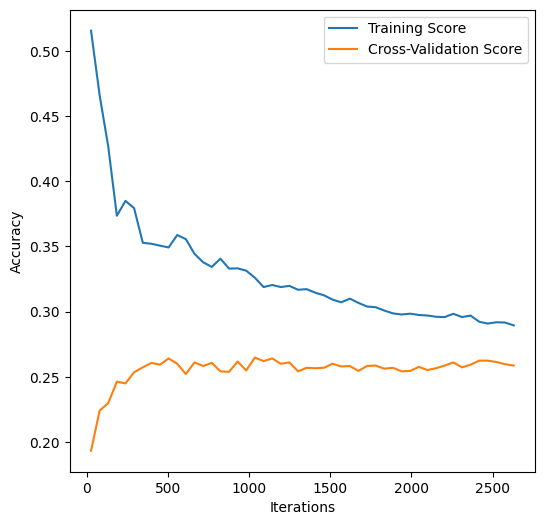

In [33]:
plt.figure(figsize=(6, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(loc="best")
plt.show()